In [1]:
%matplotlib inline


# Quick-Start: Running a simple EMD
This getting started tutorial shows how to use EMD to analyse a synthetic signal.


## Running an EMD and frequency transform
First of all, we import both the numpy and EMD modules:



In [2]:
# sphinx_gallery_thumbnail_number = 2

import matplotlib.pyplot as plt
import numpy as np
import emd

We then define a simulated waveform containing a non-linear wave at 5Hz and a sinusoid at 1Hz:



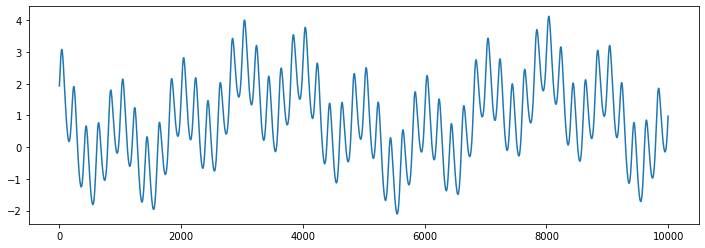

In [3]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 5

# Change extent of deformation from sinusoidal shape [-1 to 1]
nonlinearity_deg = 0.25

# Change left-right skew of deformation [-pi to pi]
nonlinearity_phi = -np.pi/4

# Compute the signal

# Create a non-linear oscillation
x = emd.simulate.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)

x += np.cos(2 * np.pi * 1 * time_vect)        # Add a simple 1Hz sinusoid
x -= np.sin(2 * np.pi * 2.2e-1 * time_vect)   # Add part of a very slow cycle as a trend

# Visualise the time-series for analysis
plt.figure(figsize=(12, 4))
plt.plot(x)

Try changing the values of ``nonlinearity_deg`` and ``nonlinearity_phi`` to
create different non-sinusoidal waveform shapes.

Next, we can then estimate the IMFs for the signal:



In [4]:
imf = emd.sift.sift(x)
print(imf.shape)

(10000, 4)


and, from the IMFs, compute the instantaneous frequency, phase and amplitude
using the Normalised Hilbert Transform Method:



In [5]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

From the instantaneous frequency and amplitude, we can compute the Hilbert-Huang spectrum:



In [6]:
# Define frequency range (low_freq, high_freq, nsteps, spacing)
freq_range = (0.1, 10, 80, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)

## Visualising the results

we can now plot some summary information, first the IMFs:



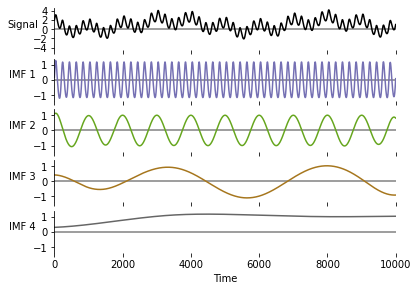

In [7]:
emd.plotting.plot_imfs(imf, scale_y=True, cmap=True)

and now the Hilbert-Huang transform of this decomposition



<AxesSubplot:title={'center':'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

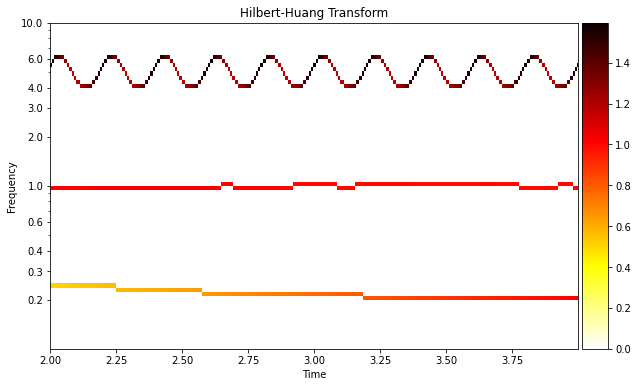

In [8]:
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               time_lims=(2, 4), freq_lims=(0.1, 15),
                               fig=fig, log_y=True)